In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

jupyter nbconvert presentacion.ipynb --to slides --no-input

In [19]:
df, target = load_iris(return_X_y=True, as_frame=True)
df: pd.DataFrame = df
target: pd.Series = target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
"sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)".split("\t")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

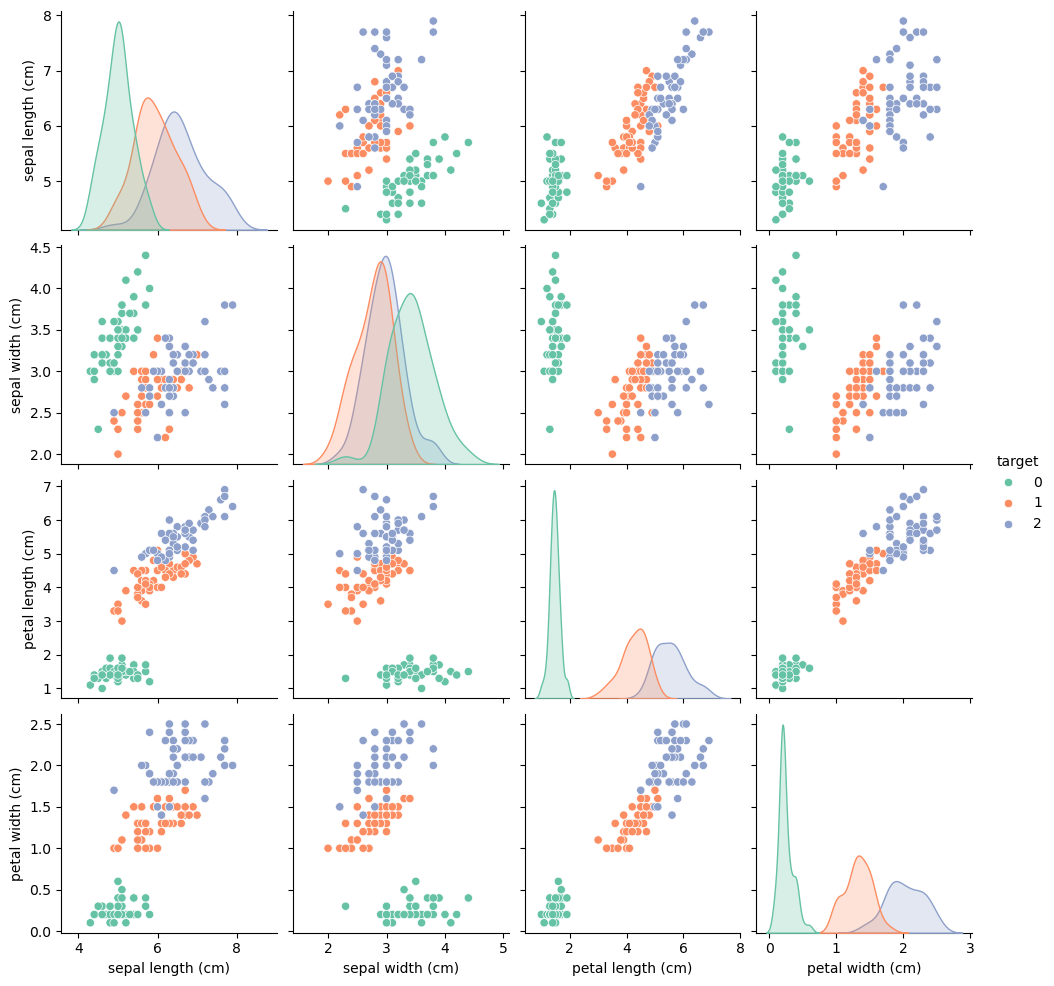

In [ ]:
df["target"] = target
sns.pairplot(df, hue="target", palette="Set2");

In [20]:
target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
df_scaled = (df - df.mean()) / df.std()

In [31]:
u, d, vt = np.linalg.svd(df_scaled, full_matrices=False)

In [32]:
scores = u @ np.diag(d)
scores.shape

(150, 4)

In [35]:
((d**2) / (df.shape[0] - 1))

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [39]:
varianzas = pd.DataFrame(scores.var(axis=0, ddof=1), index=[f"PC_{i+1}" for i in range(len(d))], columns=["varianza scores"])
varianzas["varianza relativa %"] = (varianzas["varianza scores"] / varianzas["varianza scores"].sum()).round(4)
varianzas["varianza scores"] = (varianzas["varianza scores"]).round(4)
varianzas

,varianza scores,varianza relativa %
PC_1,2.9185,0.7296
PC_2,0.9140,0.2285
PC_3,0.1468,0.0367
PC_4,0.0207,0.0052


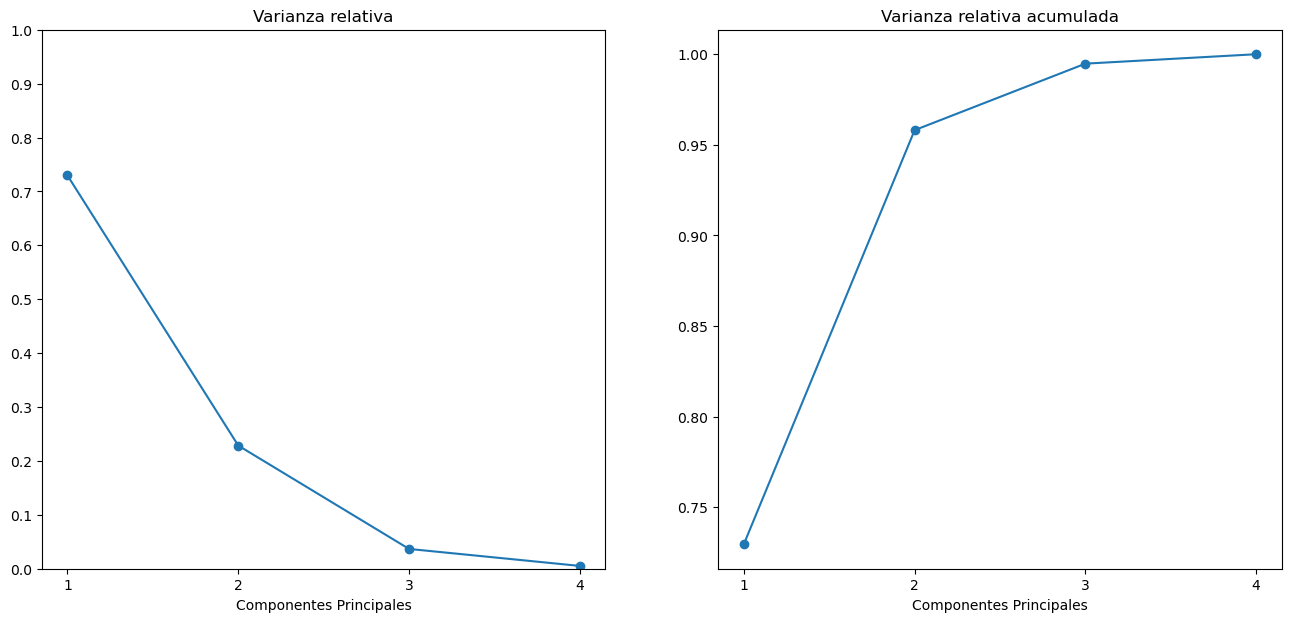

In [40]:
_, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].plot(np.arange(4)+1, varianzas["varianza relativa %"])
ax[0].scatter(np.arange(4)+1, varianzas["varianza relativa %"])
ax[0].set_ylim((0, 1))
ax[0].set_xticks(np.arange(4)+1)
ax[0].set_yticks(np.linspace(0, 1, 11))
ax[0].set_xlabel("Componentes Principales")
ax[0].set_title("Varianza relativa")

ax[1].plot(np.arange(4)+1, np.cumsum(varianzas["varianza relativa %"]));
ax[1].scatter(np.arange(4)+1, np.cumsum(varianzas["varianza relativa %"]));
ax[1].set_xticks(np.arange(4)+1)
ax[1].set_xlabel("Componentes Principales")
ax[1].set_title("Varianza relativa acumulada");

In [57]:
df_proyect = pd.DataFrame(scores, columns=[f"PC{i+1}" for i in range(scores.shape[1])])
df_proyect["target"] = target
df_proyect

,PC1,PC2,PC3,PC4,target
0,-2.257141,-0.478424,0.127280,0.024088,0
1,-2.074013,0.671883,0.233826,0.102663,0
2,-2.356335,0.340766,-0.044054,0.028282,0
3,-2.291707,0.595400,-0.090985,-0.065735,0
4,-2.381863,-0.644676,-0.015686,-0.035803,0
...,...,...,...,...,...
145,1.864258,-0.385674,-0.255418,0.387957,2
146,1.559356,0.893693,0.026283,0.219457,2
147,1.516091,-0.268171,-0.179577,0.118773,2
148,1.368204,-1.007878,-0.930279,0.026041,2


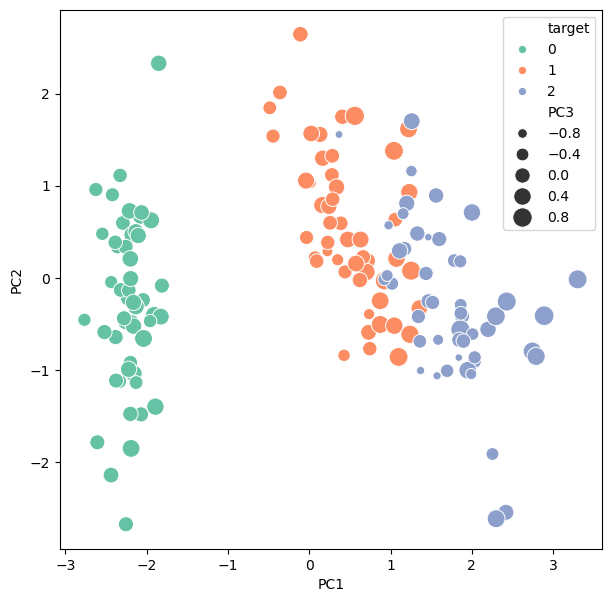

In [68]:
_, ax = plt.subplots(figsize=(7,7))

loadings = vt.T

sns.scatterplot(df_proyect, x="PC1", y="PC2", size="PC3", sizes=(30, 200), hue="target", palette="Set2");

In [50]:
target.shape

(150,)